In [1]:
# ticket is at 
# https://code.metoffice.gov.uk/trac/ancil/ticket/2416

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
processed_data_dir = '/gws/nopw/j04/cmip7/data/ancils/any/CMIP7_GHG_ANCIL_temp/' #
input4mips_data = '/gws/nopw/j04/cmip7/data/raw_sources/GHG/GHGConcentration_1.0.0/'

In [4]:
input4mips_ds = xr.open_dataset(input4mips_data+'ch4_input4MIPs_GHGConcentrations_CMIP_CR-CMIP-1-0-0_gm_1750-2022.nc')


In [5]:
processed_df = pd.read_csv(processed_data_dir+'trgas_CMIP7_historical_1850_2022.dat',sep='\s+', skiprows=13,engine='python')
# Access the 'YEARS' column using the multi-index
processed_df['YEARS'] = pd.to_datetime(processed_df['YEARS'].astype(int).astype(str) + '-01-01')
processed_df.index = pd.to_datetime(processed_df['YEARS'], format='%Y')


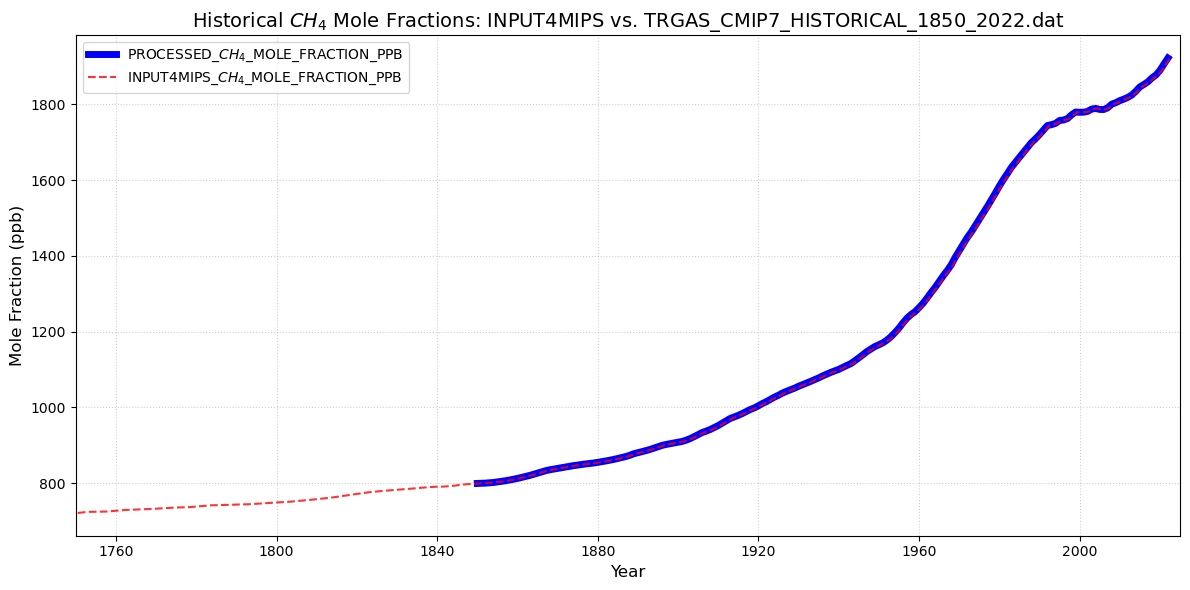

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(processed_df.index, processed_df['CH4'], label='PROCESSED_$CH_4$_MOLE_FRACTION_PPB', color='blue', linewidth=5)
ax.plot(input4mips_ds.time, input4mips_ds['ch4'].values, label='INPUT4MIPS_$CH_4$_MOLE_FRACTION_PPB', color='red', linestyle='--', alpha=0.8)


ax.set_title('Historical $CH_4$ Mole Fractions: INPUT4MIPS vs. TRGAS_CMIP7_HISTORICAL_1850_2022.dat', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel(f'Mole Fraction ({input4mips_ds.attrs.get("units", "ppb")})', fontsize=12)
ax.set_xlim(pd.Timestamp('1750-01-01'), pd.Timestamp('2025-01-01'))

ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

## SANITY CHECK THAT THE DATA ARE IN MOLE FRACTION

In [13]:

%%bash
head -n 10 /gws/nopw/j04/cmip7/data/ancils/any/CMIP7_GHG_ANCIL_temp/trgas_CMIP7_historical_1850_2022.dat


! CMIP7 historical mole fractions GHGs 
!  source: ESGF input4MIPs, v1.0.0  v20250228
 &THISFILE_SPECIFICATIONS 
 THISFILE_DATACOLUMNS    =          24, 
 THISFILE_FIRSTYEAR      =        1850, 
 THISFILE_LASTYEAR       =        2022, 
 THISFILE_ANNUALSTEPS    =           1, 
 THISFILE_FIRSTDATAROW   =          15, 
 THISFILE_UNITS          =  SEE ROW 13, 
 THISFILE_DATTYPE        =  RCPDAT 


In [17]:
%%bash 
ncdump -h -v,ch4 /gws/nopw/j04/cmip7/data/raw_sources/GHG/GHGConcentration_1.0.0/ch4_input4MIPs_GHGConcentrations_CMIP_CR-CMIP-1-0-0_gm_1750-2022.nc | grep ch4:units

		ch4:units = "ppb" ;
